# Hands-On Exercise 7.1:
# Cluster Analysis on Structured Data With Python
***

## Objectives

#### In this exercise, you will perform cluster analysis on structured data using Python. This exercise allows you to find natural grouping within the data set using a number of attributes and distance measures. The goal is to show you how clustering can be used to divide a data set into previously unknown groupings.

### Overview

You will work on a data set called Iris that is included with the datasets package. You will:<br>
● Assess what might be an appropraite number of clusters<br>
● Cluster the data using a distance measure<br>
● Evaluate the resulting clusters<br><br>


**Major Step: Data loading and text preprocessing**

1. ❏ Import the **pandas** and **numpy** libraries<br><br>
*Hint: Use pd and np as aliases*

In [44]:
import pandas as pd
import numpy as np

2. ❏ Import **cluster** from **sklearn**

In [45]:
from sklearn import cluster

3. ❏ Import the **iris** data set from the **iris.csv** file and preview the first few rows using the **.head()** method

In [46]:
data = pd.read_csv("iris.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


4. ❏ Remove the species attribute and convert it to a numpy array <br>

In [47]:
data.drop(columns=["species"], inplace=True)

5. ❏ Apply clustering to the data using K-Means with a clustering value of 3.

In [48]:
clf = cluster.KMeans(n_clusters=3)
clf.fit(np.array(data))

KMeans(n_clusters=3)

6. ❏ View the assigned labels using the **.labels_** attribute

In [60]:
type(clf.labels_)
type(pd.DataFrame(clf.labels_))
labels = clf.labels_

7. ❏ View the cluster centers using the **.cluster_centers_** attribute

In [50]:
clf.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

8. ❏ Import **pyplot** from **matplotlib**

In [51]:
from matplotlib import pyplot as plt
 

9. ❏ Plot the three clusters, using two attributes at a time (eg. 0 and 1) and plot the centroids of the three clusters

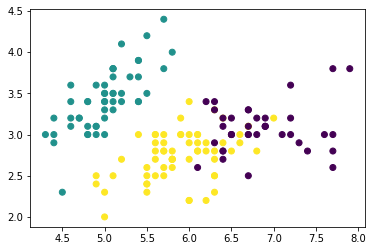

In [52]:
label0 = data[labels==0]
label1 = data[labels==1]
label2 = data[labels==2]

# plt.scatter(label0.sepal_length, label0.sepal_width, c='green')
# plt.scatter(label1.sepal_length, label1.sepal_width, c='red')
# plt.scatter(label2.sepal_length, label2.sepal_width, c='blue')
plt.scatter(data.sepal_length, data.sepal_width, c=labels)

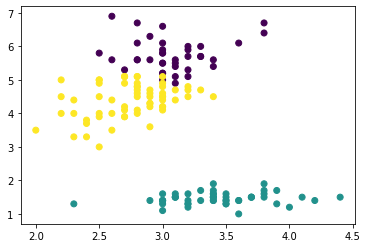

In [53]:
plt.scatter(data.sepal_width,data.petal_length, c=labels)

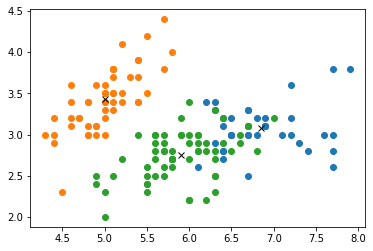

In [56]:
centroids = clf.cluster_centers_
for i in range(3): 
    ds = np.array(data)[np.where(labels==i)]
    plt.plot(ds[:,0], ds[:,1], 'o')
    plt.plot(centroids[i,0], centroids[i,1], 'kx')


10. ❏ Import the **dendrogram** and **linkage** functions from **scipy.cluster.hierarchy**

In [57]:
from scipy.cluster.hierarchy import dendrogram, linkage

11. ❏ Using a **ward** agglomeration technique, build a dendrogram to visualize the clusters hierarchically

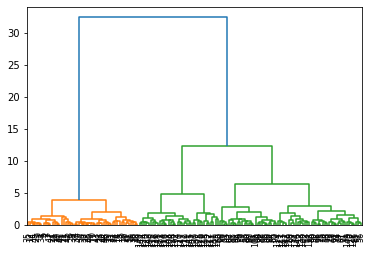

In [59]:
Z = linkage( np.array(data), 'ward')
dendrogram(
    Z,
    leaf_rotation=90., # rotates the x axis labels
    leaf_font_size=8., # font size for the x axis labels
)
plt.show()

12. ❏ How many natural clusters do you think there are?

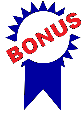<br><br>

**If you have time, you may like to examine and run the demo code below which uses the KMeans Clustering Algorithm to segment an image. Image Segmentation is the process of assigning a label to every pixel in an image. Segmentation is used in object detection, medical imaging, facial recognition and many other applications.**<br><br>

13. ❏ Import packages and image

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
original_image = cv2.imread("Nature.jpg")
original_image.shape

14. ❏ Pre-process the image

In [ ]:
img=cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB) # convert image to RGB color for matplotlib
vectorized = img.reshape((-1,3))  # vectorize the image
vectorized = np.float32(vectorized)          # and convert to float32 (required for kmeans)

15. ❏ Cluster the colors using OpenCV's **kmeans** algorithm<br>
Documentation: https://docs.opencv.org/2.4/modules/core/doc/clustering.html

In [ ]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 4          # No. of clusters to find
attempts=10    # No. of times to iterate through the algorithm
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)

16. ❏ Regenerate the clustered image

In [ ]:
center = np.uint8(center)   # Convert back into uint8
res = center[label.flatten()]   # Access the labels to regenerate the clustered image
seg_image = res.reshape((img.shape))   # Clustered image

17. ❏ Display the original image and the segmented image

In [ ]:
plt.figure(figsize=(12,12))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image')
plt.subplot(1,2,2),plt.imshow(seg_image)
plt.title('Segmented image when K is %x' % K)
plt.show()

## <center>**Congratulations! You have successfully performed clustering analysis on structured and unstructured data in Python.**</center>

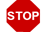

# <center>**This is the end of the exercise.**</center>